In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# 1. Pre-Processing

### 1.1 Load Data

In [42]:
df = pd.read_csv('Resources/heart_attack_final_table.csv')
df.head()

,id,ever_overweight,blood_transfusion_yr,heart_attack_age,fatty_liver,liver_fibrosis,liver_cirrhosis,liver_viral_hepatitis,liver_autoimmune_hepatitis,other_liver_disease,...,stroke,thyroid,liver_disease,gallbladder_pr,Total_Cholesterol_mg_dL,Frequency_of_Drinking,Drinks_per_Day,Work,Recreational,100_Cigarettes
0,109266.0,1,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,195.0,10.0,1.0,0,1,0
1,109274.0,1,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,105.0,4.0,2.0,1,0,0
2,109292.0,0,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,172.0,4.0,6.0,0,0,0
3,109297.0,0,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,214.0,6.0,2.0,1,0,0
4,109307.0,0,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,161.0,9.0,1.0,0,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5502 entries, 0 to 5501
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5502 non-null   float64
 1   ever_overweight             5502 non-null   int64  
 2   blood_transfusion_yr        527 non-null    float64
 3   heart_attack_age            199 non-null    float64
 4   fatty_liver                 5502 non-null   int64  
 5   liver_fibrosis              5502 non-null   int64  
 6   liver_cirrhosis             5502 non-null   int64  
 7   liver_viral_hepatitis       5502 non-null   int64  
 8   liver_autoimmune_hepatitis  5502 non-null   int64  
 9   other_liver_disease         5502 non-null   int64  
 10  relative_asthma             5502 non-null   int64  
 11  relative_diabetes           5502 non-null   int64  
 12  relative_heart_attack       5502 non-null   int64  
 13  heart_attack                5502 

In [44]:
#remove columns that have null values and id since it is not useful for this
df = df.drop(['blood_transfusion_yr', 'heart_attack_age', 'id'], axis=1)

### 1.2 Define Features Set and Target Vector

In [45]:
X = df.copy()
X.drop("heart_attack", axis=1, inplace=True)
X.head()

,ever_overweight,fatty_liver,liver_fibrosis,liver_cirrhosis,liver_viral_hepatitis,liver_autoimmune_hepatitis,other_liver_disease,relative_asthma,relative_diabetes,relative_heart_attack,...,stroke,thyroid,liver_disease,gallbladder_pr,Total_Cholesterol_mg_dL,Frequency_of_Drinking,Drinks_per_Day,Work,Recreational,100_Cigarettes
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,195.0,10.0,1.0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,105.0,4.0,2.0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,172.0,4.0,6.0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,214.0,6.0,2.0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,161.0,9.0,1.0,0,0,1


In [46]:
y = df["heart_attack"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

### 1.3 Split into Training and Testing Data Sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1.4 Scale Data

In [48]:
scaler = StandardScaler()

In [49]:
X_scaler = scaler.fit(X_train)

In [50]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 2. Create Random Forest

### 2.1 Fit the Model

In [51]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [52]:
rf_model = rf_model.fit(X_train_scaled, y_train)

### 2.2 Make Predictions

In [53]:
predictions = rf_model.predict(X_test_scaled)

### 2.3 Evaluate the Model

In [54]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [55]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1335,0
Actual 1,8,33


Accuracy Score : 0.9941860465116279
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1335
           1       1.00      0.80      0.89        41

    accuracy                           0.99      1376
   macro avg       1.00      0.90      0.94      1376
weighted avg       0.99      0.99      0.99      1376



# 3. Feature Importances

In [56]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2585526341913756, 'chronic_heart_disease'),
 (0.1253820193266512, 'heart_failure'),
 (0.12245860237769822, 'Total_Cholesterol_mg_dL'),
 (0.10506320764363768, 'angina_pectoris'),
 (0.09066739350864049, 'stroke'),
 (0.06652064898056814, 'asthma'),
 (0.0463700640565621, 'Frequency_of_Drinking'),
 (0.041957006153790714, 'gallbladder_pr'),
 (0.03943048677694573, 'Drinks_per_Day'),
 (0.022648803306446086, 'thyroid'),
 (0.020765667336722252, 'liver_disease'),
 (0.010136124160852576, 'ever_overweight'),
 (0.009185366280423182, 'relative_diabetes'),
 (0.009093324743151618, 'relative_asthma'),
 (0.00885501222828634, 'Work'),
 (0.008534190563943602, '100_Cigarettes'),
 (0.0080330624549707, 'relative_heart_attack'),
 (0.005577570645185483, 'Recreational'),
 (0.0007688152641482244, 'fatty_liver'),
 (0.0, 'other_liver_disease'),
 (0.0, 'liver_viral_hepatitis'),
 (0.0, 'liver_fibrosis'),
 (0.0, 'liver_cirrhosis'),
 (0.0, 'liver_autoimmune_hepatitis')]

<AxesSubplot:title={'center':'Features Importances'}, xlabel='Importance', ylabel='Feature'>

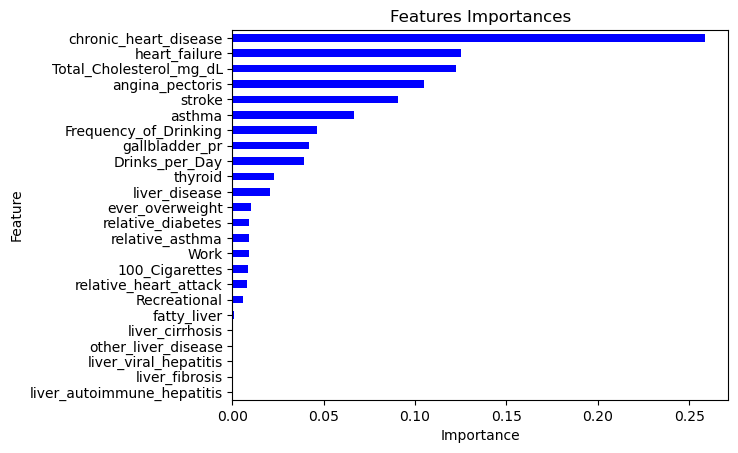

In [62]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', ylabel='Feature',
                        xlabel='Importance', legend=False)